In [31]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

from selenium import webdriver

from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비 
import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml 
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.linear_model    import LogisticRegression , Ridge , RidgeClassifier


from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , RocCurveDisplay , roc_auc_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer
from   sklearn.impute          import SimpleImputer
from   sklearn.base            import BaseEstimator 

from   IPython.display import Image


sklearn.__version__

'0.24.2'

In [2]:
def metrics_evaluation(target , prediction) :
    print('confusion matrix \n' , confusion_matrix(target , prediction))
    print()
    print('accuracy \n' , accuracy_score(target , prediction))
    print()
    print('recall \n'   , recall_score(target , prediction))
    print()
    print('precision \n'   , precision_score(target , prediction))
    print()
    print('f1 score \n'   , f1_score(target , prediction))

In [3]:
fish_market = pd.read_csv('C:/Users/crid2/dataset/Fish.csv')

In [4]:
fish_market

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
aver_fish = fish_market.groupby(by='Species').mean()
aver_fish = aver_fish.reset_index()

스타일 테마 적용 가능 - darkgrid , whitegrid , dark , white , ticks 


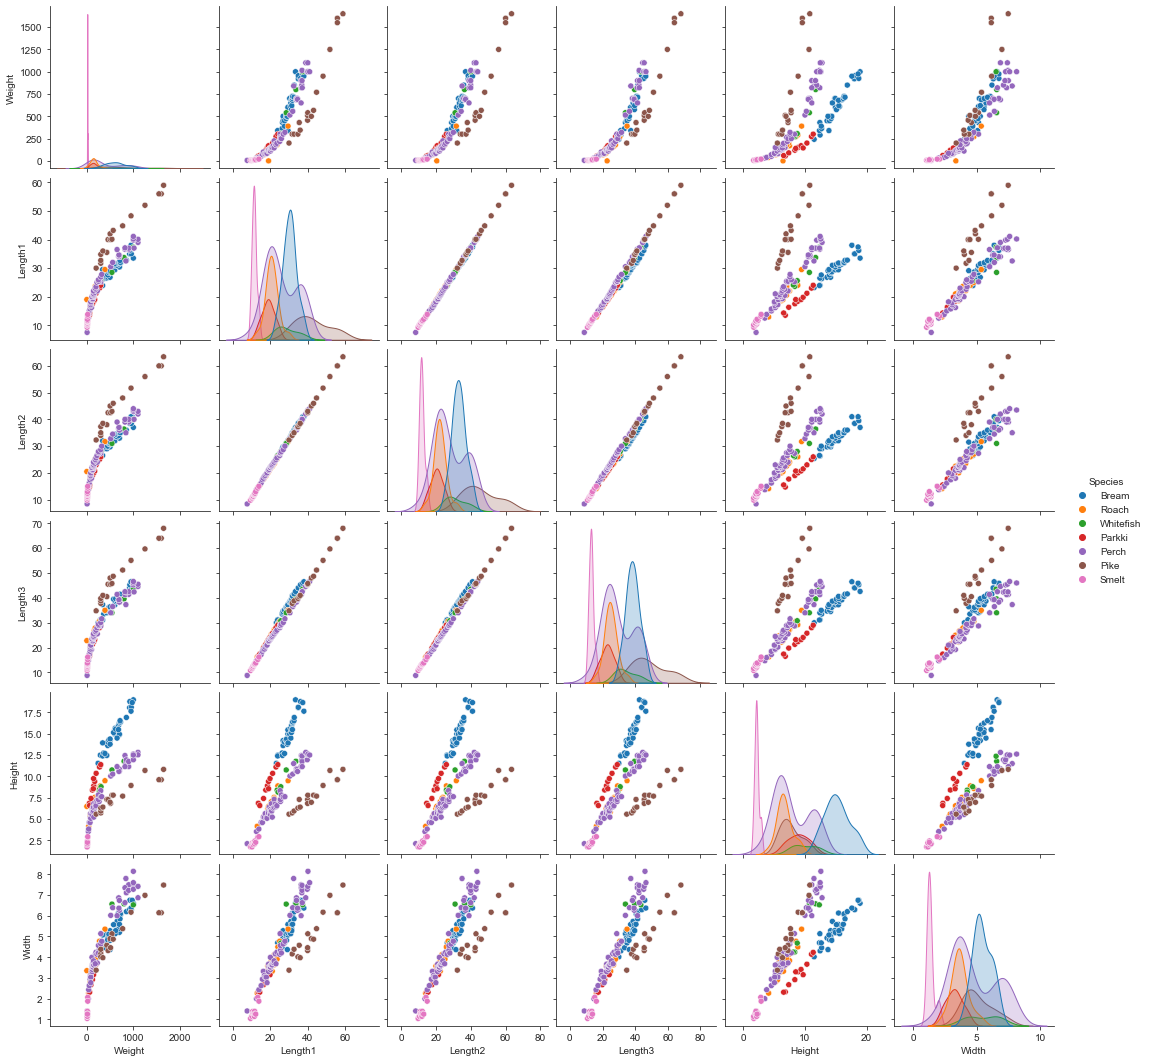

In [6]:
print('스타일 테마 적용 가능 - darkgrid , whitegrid , dark , white , ticks ')

sns.set_style('ticks')
sns.pairplot(data = fish_market , hue='Species' )

# 이걸 먼저 보고 그래프를 정해도 되겠다. 


In [7]:
# 분류 작업을 해보자. 
# 먼저 원핫 인코딩으로 라벨을 문자열에서 -> 숫자열로 바꾼다. 
# 데이터 결측치 null값이 존재하는지 확인해볼것 . 

In [8]:
# sklearn imporkt Onehotencoder 추가할것 

fish_name = fish_market['Species']

encoder = LabelEncoder()
encoder.fit(fish_name)
labels = encoder.transform(fish_name)


print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]


In [9]:
fish_market['encoder_labels'] = labels
fish_market = fish_market.drop('Species' , axis=1 )


In [10]:
columns = fish_market.columns  
fish_market
# 문자열 라벨 지운 후 숫자로 된 라벨 재지정 완료 

,Weight,Length1,Length2,Length3,Height,Width,encoder_labels
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0
...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,5
155,13.4,11.7,12.4,13.5,2.4300,1.2690,5
156,12.2,12.1,13.0,13.8,2.2770,1.2558,5
157,19.7,13.2,14.3,15.2,2.8728,2.0672,5


In [11]:
# 결측치 없음 
fish_market.isnull().sum()

Weight            0
Length1           0
Length2           0
Length3           0
Height            0
Width             0
encoder_labels    0
dtype: int64

In [12]:
# for문으로 여러번 돌려서 값을 나오게 해보자. 


for i in range(3) : 
  
    X_train , X_test , y_train , y_test = train_test_split(fish_market.iloc[: , 0:6] , fish_market[['encoder_labels']],
                                                          test_size=0.3)
    fish_model = DecisionTreeClassifier()
    fish_model.fit(X_train, y_train)

    y_pred = fish_model.predict(X_test)
    
 
   
    print('예측정확도  : ' ,   accuracy_score(y_test, y_pred) )
  




예측정확도  :  0.7083333333333334
예측정확도  :  0.6666666666666666
예측정확도  :  0.75


In [13]:
# 최적 모델을 뽑기위해서 gridSeacrCV 사용할 줄 알아야한다. 그밖에 cross_valdidate, 있긴하지만 일단 GridSearchCV 가장 유용
# grid_param 파라메터를 미리 알고 있어야 사용가능 
params = {'max_depth' : [2,3,5,10],
         'min_samples_split' : [2,3,5],
         'min_samples_leaf':[1,5,8]}

params02 = {
    'criterion' : ['gini' , 'entropy'],
    'splitter' : ['best' , 'random'], # spllitter라고 했다. 오타 주의 
    'max_depth' : [1,2,3] , 
    'min_samples_split' : [2, 3 ]
}

In [14]:
GridSearchCV_fish_model = GridSearchCV(fish_model , param_grid=params , scoring='accuracy' , cv=5  )
GridSearchCV_fish_model.fit(X_train, y_train)

print('잘나오는 성능은 ?' , GridSearchCV_fish_model.best_params_ , GridSearchCV_fish_model.best_score_)



잘나오는 성능은 ? {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.6656126482213438


In [15]:
# 예측? 
good_fish_model  = GridSearchCV_fish_model.best_estimator_
good_fish_model.predict(X_test)
accuracy = accuracy_score(y_test, good_fish_model.predict(X_test))

print(accuracy)


0.75


##### DecisionTree 에서 사용할 수 있는 파라미터

- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- max_depth : 트리의 최대 깊이 (값이 클수록 모델의 복잡도가 올라간다.)
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- max_leaf_nodes : 리프 노드의 최대수
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- class_weight : 클래스 가중치
- presort : 데이터 정렬 필요 여부

In [16]:
# 성능이 만족스럽지 않다. 정규화나 표준화로 다시 돌려본다. ! 
# 애시당초 물고기 무게로 구분하는건데 결정트리 모델이 올바른걸까 ? 라는 근복적인 질문을 하게 된다. 

In [17]:
# 표준화 StandScale 

X_train , X_test , y_train , y_test = train_test_split(fish_market.iloc[: , 0:6] , fish_market[['encoder_labels']],
                                                          test_size=0.25 , shuffle=True)
s_scale = StandardScaler()
s_scale.fit(X_train)

s_train_data = s_scale.transform(X_train)
s_test_data = s_scale.transform(X_test)

fish_model = DecisionTreeClassifier()
fish_model.fit(s_train_data , y_train)

y_pred = fish_model.predict(s_test_data)
accuracy_score(y_pred, y_test) 

# 성능이 매우 ??? ㅡ_ㅡ  fish.model.predict(x_test)넣으면 20%뜸 왜냐 x_test는 표준화를 안해서 . 완전 어긋나는 거임 


0.7

In [18]:
GridSearchCV_fish_model = GridSearchCV(fish_model , param_grid=params , scoring='accuracy' , cv=5 )
GridSearchCV_fish_model.fit(s_train_data, y_train)

print('잘나오는 성능은 ?' , GridSearchCV_fish_model.best_params_ , GridSearchCV_fish_model.best_score_)



잘나오는 성능은 ? {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3} 0.7644927536231882


In [19]:
# 예측?  별차이가 안나는데.... -_-;
good_fish_model  = GridSearchCV_fish_model.best_estimator_
good_fish_model.predict(s_test_data)
accuracy = accuracy_score(y_test, good_fish_model.predict(s_test_data))

print(accuracy)



0.675


In [20]:
# 이제는 어떻한 요소가 예측에  가장 영향을 미치는지 확인해보자. , 물고기 길이가 가장 큰 요소였네 

<AxesSubplot:>

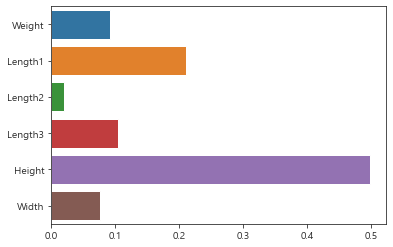

In [28]:
point = good_fish_model.feature_importances_
point
re_columns =  columns[0:-1] # 마지막 target만 제외한 컬럼값 
sns.barplot(x = point , y = re_columns) 

# DecisionClassfier 모델로 돌린 머신러닝은 여러가지요소중에 height 가장 중요하게 여겼다. 애시당초 length 1,2,3,값의 의미를 모르겠네 


In [29]:
# commit ver 1.0 end 220416 

In [44]:
X_train , X_test , y_train , y_test = train_test_split(fish_market.iloc[: , 0:6] , fish_market[['encoder_labels']],
                                                          test_size=0.25 , shuffle=True)

Ridge_model = RidgeClassifier()
Ridge_model.fit(X_train , y_train)
y_pred = Ridge_model.predict(X_test)

acc_score = accuracy_score(y_test , y_pred)
acc_score




0.875

In [72]:
param_ridge = {
    'alpha' :[1.0],
    'tol' : [0.001]
    
}

grid_ridge_model = GridSearchCV(Ridege_model, param_grid= param_ridge , cv=10 , refit=True)
grid_ridge_model.fit(X_train ,y_train)
y_pred = grid_ridge_model.predict(X_test)

print('예측 : ' , y_pred)
print('정답 : ' , y_test.values.reshape(1,-1))
print('예측률 : ' , accuracy_score(y_test, y_pred))

예측 :  [5 0 0 0 2 0 0 2 3 3 2 4 2 0 0 2 2 3 0 2 2 2 2 5 2 0 4 5 2 3 2 0 2 4 2 0 4
 5 4 0]
정답 :  [[5 0 0 0 2 0 0 2 3 3 5 4 2 0 0 2 1 3 1 1 2 2 2 5 2 0 4 5 2 3 2 0 2 4 2 0
  4 1 4 0]]
예측률 :  0.875


RidgeClassifier()